In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')


# Creating data Frame

In [2]:
data = pd.read_excel('Sales data Tablue.xlsx')
data.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Year,Order_ID,Ship_Date,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
0,Central America,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,2013,957081544,2014-11-01 00:00:00,552,255.28,159.42,95.86,52914.72
1,Central America,Panama,Snacks,Offline,C,2010-05-07 00:00:00,2010,301644504,7/26/2010,2167,152.58,97.44,55.14,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,2011-12-09 00:00:00,2011,478051030,9/29/2011,4778,47.45,31.79,15.66,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,2010,892599952,6/15/2010,9016,205.70,117.11,88.59,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,2015,571902596,7/27/2015,7542,152.58,97.44,55.14,415865.88


## Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             5000 non-null   object 
 1   Country            5000 non-null   object 
 2   Item_Type          5000 non-null   object 
 3   Sales_Channel      5000 non-null   object 
 4   Order_Priority     5000 non-null   object 
 5   Order_Date         5000 non-null   object 
 6   Year               5000 non-null   int64  
 7   Order_ID           5000 non-null   int64  
 8   Ship_Date          5000 non-null   object 
 9   Units_Sold         5000 non-null   int64  
 10  Unit_SellingPrice  5000 non-null   float64
 11  Unit_MakingCost    5000 non-null   float64
 12  unit_per Profit    5000 non-null   float64
 13  Total profit       5000 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 547.0+ KB


## Describing the data 

In [5]:
data.describe().style.background_gradient(cmap='Reds')

,Year,Order_ID,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2013.318000,548270860.820000,5030.926400,265.745564,187.494144,78.251420,392501.011340
std,2.177665,259549560.023373,2912.291375,218.716695,176.416280,53.403068,382420.004724
min,2010.000000,13421235.000000,2.000000,9.330000,6.920000,2.410000,16.870000
25%,2011.000000,319102894.500000,2456.250000,81.730000,35.840000,25.060000,85491.900000
50%,2013.000000,552121412.500000,5122.000000,154.060000,97.440000,63.130000,279624.180000
75%,2015.000000,768564950.750000,7574.500000,437.200000,263.330000,126.250000,564906.657500
max,2017.000000,999879729.000000,9999.000000,668.270000,524.960000,173.870000,1726007.490000


## Checking for Null values

In [4]:
data.isna().sum()


Region               0
Country              0
Item_Type            0
Sales_Channel        0
Order_Priority       0
Order_Date           0
Year                 0
Order_ID             0
Ship_Date            0
Units_Sold           0
Unit_SellingPrice    0
Unit_MakingCost      0
unit_per Profit      0
Total profit         0
dtype: int64

## Data Cleanign 
Checking the unique values in all the 13 columns

In [5]:
for i in data.columns:
    print(i,'------->', data[i].unique())
    

Region -------> ['Central America ' 'Europe' 'Asia' 'Middle East/North Africa'
 'Australia/Oceania' 'Sub-Saharan Africa' 'North America']
Country -------> ['Antigua and Barbuda ' 'Panama' 'Czech Republic' 'North Korea'
 'Sri Lanka' 'Morocco' 'Federated States of Micronesia'
 'Bosnia and Herzegovina' 'Afghanistan' 'Ethiopia' 'Turkey' 'Oman'
 'Malaysia' 'Saint Lucia' 'Saint Vincent and the Grenadines' 'Lebanon'
 'Austria' 'Bulgaria' 'Mexico' 'Trinidad and Tobago' 'Libya' 'Algeria'
 'Estonia' 'Tuvalu' 'Saudi Arabia' 'Cuba' 'Montenegro' 'Guatemala'
 'Guinea' 'Vanuatu' 'United Arab Emirates' 'Australia' 'Malawi'
 'Luxembourg' 'Benin' 'Somalia' 'Switzerland' 'Laos' 'Kyrgyzstan' 'Angola'
 'Mauritania' 'Finland' 'Taiwan' 'Belgium' 'San Marino' 'Kiribati'
 'Samoa ' 'Central African Republic' 'Uzbekistan' 'Dominica' 'Qatar'
 'South Korea' 'Nigeria' 'South Africa' 'Sudan' 'Netherlands'
 'Solomon Islands' 'Iran' 'Equatorial Guinea' 'Russia' 'Azerbaijan' 'Iraq'
 'Mauritius ' 'Eritrea' 'Ukraine' 'My

In [6]:
for i in data.columns:
    print(i,'------->', data[i].nunique())
    

Region -------> 7
Country -------> 185
Item_Type -------> 12
Sales_Channel -------> 2
Order_Priority -------> 4
Order_Date -------> 2305
Year -------> 8
Order_ID -------> 5000
Ship_Date -------> 2320
Units_Sold -------> 3948
Unit_SellingPrice -------> 12
Unit_MakingCost -------> 12
unit_per Profit -------> 12
Total profit -------> 4909


## Removing the unused data 
like Order date, Ship Date, Order Id

In [7]:
# Let's drop the some columns
data=data.drop(['Order_Date','Ship_Date','Order_ID'],axis=1)
data.head().style.background_gradient(cmap='twilight_shifted_r')

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
0,Central America,Antigua and Barbuda,Baby Food,Online,M,2013,552,255.280000,159.420000,95.860000,52914.720000
1,Central America,Panama,Snacks,Offline,C,2010,2167,152.580000,97.440000,55.140000,119488.380000
2,Europe,Czech Republic,Beverages,Offline,C,2011,4778,47.450000,31.790000,15.660000,74823.480000
3,Asia,North Korea,Cereal,Offline,L,2010,9016,205.700000,117.110000,88.590000,798727.440000
4,Asia,Sri Lanka,Snacks,Offline,C,2015,7542,152.580000,97.440000,55.140000,415865.880000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


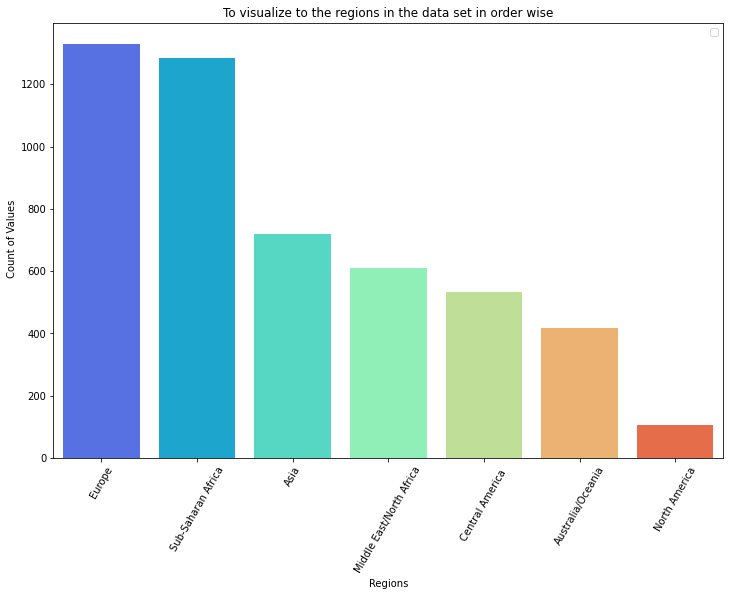

In [8]:
region = data.Region.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=region.index, y=region, palette='rainbow')
plt.xlabel("Regions")
plt.ylabel(" Count of Values")
plt.xticks(rotation=60)
plt.title("To visualize to the regions in the data set in order wise")
plt.legend()
plt.show()


In [9]:
data.columns

Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Year', 'Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost',
       'unit_per Profit', 'Total profit'],
      dtype='object')

In [11]:
plt.figure(figsize=(12,8))

fig = px.scatter_matrix(data, dimensions=['Units_Sold', 'Unit_SellingPrice', 'Unit_MakingCost',
 'unit_per Profit', 'Total profit'], color="Region",color_discrete_sequence=px.colors.sequential.Plotly3)
fig.show()
pio.write_image(fig, "op1.png")


## EDA on Europe

In [10]:
europe = data[data['Region']=='Europe']
europe.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
2,Europe,Czech Republic,Beverages,Offline,C,2011,4778,47.45,31.79,15.66,74823.48
7,Europe,Bosnia and Herzegovina,Clothes,Online,M,2013,927,109.28,35.84,73.44,68078.88
16,Europe,Austria,Cereal,Offline,C,2014,5616,205.70,117.11,88.59,497521.44
17,Europe,Bulgaria,Office Supplies,Online,L,2010,6266,651.21,524.96,126.25,791082.50
22,Europe,Estonia,Fruits,Online,L,2016,4958,9.33,6.92,2.41,11948.78


In [13]:
fig = px.scatter(data, x = 'Unit_SellingPrice', y='Unit_MakingCost', color=data['Item_Type']=='Cosmetics', marginal_y='violin', marginal_x='box',trendline='ols', template='simple_white')
fig.show()
pio.write_image(fig, "Scatter.png")

## Finding the country which have done most sales in Europe Region.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


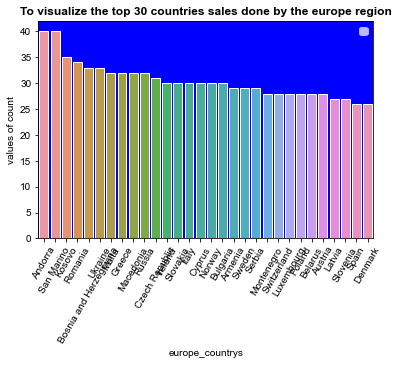

In [11]:
europe_country = europe.Country.value_counts()[:30]
ax = plt.axes()
ax.set(facecolor='blue')
sns.set(rc= {'figure.figsize':(12,12)}, style='dark')
ax.set_title("To visualize the top 30 countries sales done by the europe region", fontweight='bold')
sns.barplot(x=europe_country.index, y=europe_country)
plt.xlabel('europe_countrys')
plt.ylabel('values of count')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [18]:

#Let's visualize the Item_Type with sales_channel with Total profit
fig =px.pie(europe,values='Total profit',names='Item_Type',color='Sales_Channel',color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

# Observation 

In [12]:
#Let's visualize the europe country with total profit in which year
fig =px.histogram(europe,x='Country',y='Total profit',color='Year',color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_layout(title='Which coutrty get more profit in year wise in eurpoe region',
 template='presentation')
fig.update_traces(textposition='inside')
fig.show()
pio.write_image(fig, "hist1.png")

Observation:
1) 2011 Poland get more profit compared to the other countrys and then Czech R, Latvia get more profit 
2) By 2013 Croatia get 3.2M and Serbia get 3.0M
3) By 2014 Portugal 4.6 M 4) By 2010 Austria 3.4 M 5) By 2016 Andorra 4.6M 6) By 2012 Bosain 5.7 M 7) By 2015 Macedoina 4.7 M 8) By 2017
Macedoina 3.0 M


In [ ]:
fig=px.histogram(europe,x='Country',y='Units_Sold',color='Sales_Channel',
 orientation = "v",
 color_discrete_sequence=px.colors.sequential.amp
 )
fig.update_layout(template='plotly_dark')
fig.show()
pio.write_image(fig, "hist2.png") 

In [12]:

groupby=europe.groupby('Country')[['Units_Sold','Total profit']].agg('mean').sort_values(by='Total profit',ascending=False)
groupby.head()


,Units_Sold,Total profit
Country,,
Hungary,6089.680000,551449.241200
Albania,4314.666667,499557.429524
Malta,5426.281250,456566.496250
Portugal,4993.000000,453816.303600
Slovenia,5795.518519,449019.426667


In [ ]:
fig=px.scatter(groupby,x='Units_Sold',y='Total profit',color=groupby.index,color_discrete_sequence=px.colors.sequential.Burg)
fig.update_layout(template='plotly_dark')
pio.write_image(fig, "scatter.png")
fig.show()

In [13]:
africa=data[data['Region']=='Sub-Saharan Africa']
africa.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
9,Sub-Saharan Africa,Ethiopia,Baby Food,Online,M,2015,9817,255.28,159.42,95.86,941057.62
28,Sub-Saharan Africa,Guinea,Baby Food,Online,M,2012,5910,255.28,159.42,95.86,566532.60
33,Sub-Saharan Africa,Malawi,Meat,Online,L,2012,5562,421.89,364.69,57.20,318146.40
38,Sub-Saharan Africa,Benin,Personal Care,Online,L,2016,3104,81.73,56.67,25.06,77786.24
45,Sub-Saharan Africa,Angola,Office Supplies,Offline,C,2015,9224,651.21,524.96,126.25,1164530.00


In [ ]:
fig = px.scatter(africa, x="Unit_SellingPrice", y="Unit_MakingCost", color='Year', marginal_y="violin",
 marginal_x="box", trendline="ols", template="simple_white")
fig.show()
pio.write_image(fig, "scatter3.png")

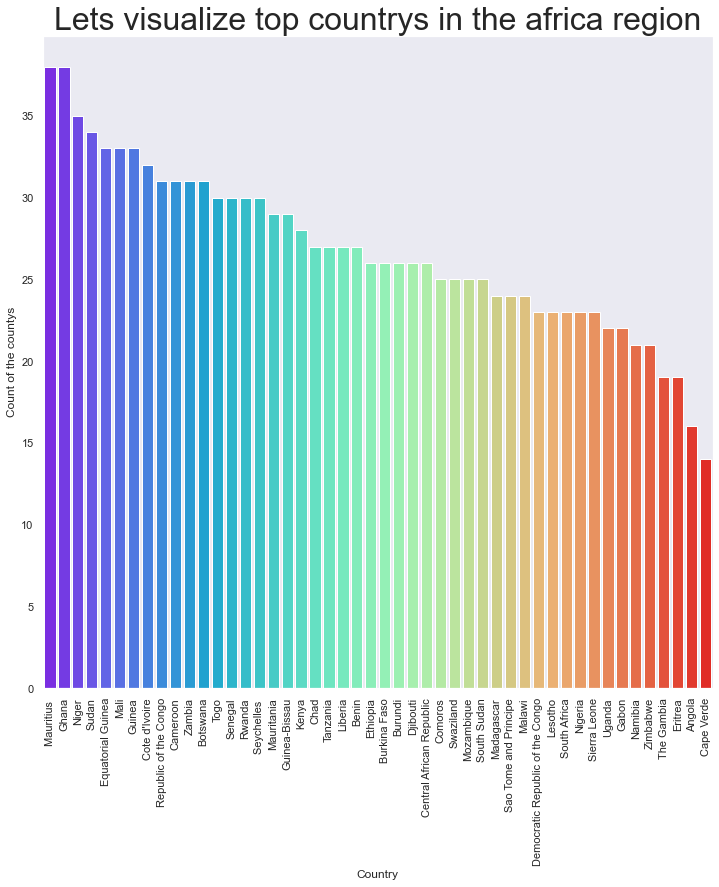

In [14]:
#Let's visualize the countys in the africa
africa_countrys=africa['Country'].value_counts()
ax=plt.axes()
ax.set_title("Lets visualize top countrys in the africa region",fontsize=32)
sns.set(rc={'figure.figsize':(17,10)},style='darkgrid')
sns.barplot(x=africa_countrys.index,y=africa_countrys,palette='rainbow')
plt.xlabel("Country")
plt.ylabel('Count of the countys')
plt.xticks(rotation=90)
plt.show()


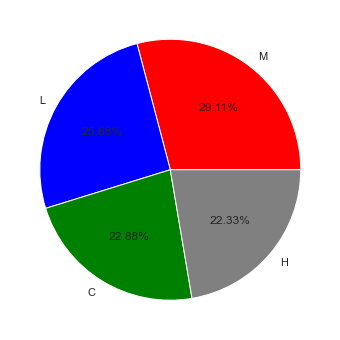

In [15]:
#Order_Priority visualize
plt.figure(figsize=(17,6))
# sns.countplot(x=africa['Order_Priority'],palette=['red','blue','green','gray'])
# plt.show()
plt.pie(africa['Order_Priority'].value_counts(),labels=['M','L','C','H'],autopct='%1.2f%%',colors=['red','blue','green','gray'])
plt.show()

In [8]:
#Let's visualize the Item_Type with sales_channel with Total profit
fig =px.pie(africa,values='Total profit',names='Item_Type',color='Sales_Channel',color_discrete_sequence=px.colors.sequential.Plotly3
 )
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()


In [ ]:

fig=px.histogram(africa,x='Country',y='Total profit',color=africa['Item_Type']=='Cosmetics',color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_layout(template='plotly_dark')
pio.write_image(fig, "hist3.png")
fig.show()


In [ ]:

#Let's visualize the europe country with total profit in which year
fig =px.histogram(africa,x='Country',y='Total profit',color='Year',color_discrete_sequence=px.colors.sequential.YlGn)
fig.update_layout(title='Which coutrty get more profit in year wise in africa region',
 template='plotly_dark')
fig.update_traces(textposition='inside')
fig.show()
pio.write_image(fig, "hist3.png") 

In [16]:
numeric=africa[['Units_Sold','Unit_SellingPrice','Unit_MakingCost','unit_per Profit','Total profit']]
numeric.head()

,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
9,9817,255.28,159.42,95.86,941057.62
28,5910,255.28,159.42,95.86,566532.60
33,5562,421.89,364.69,57.20,318146.40
38,3104,81.73,56.67,25.06,77786.24
45,9224,651.21,524.96,126.25,1164530.00


Units_Sold


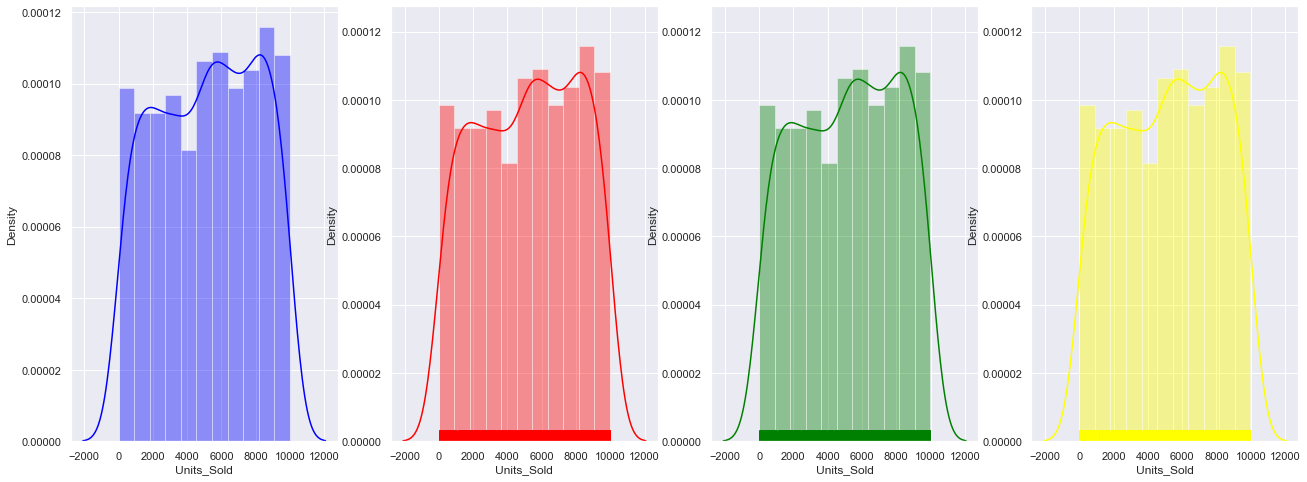

Unit_SellingPrice


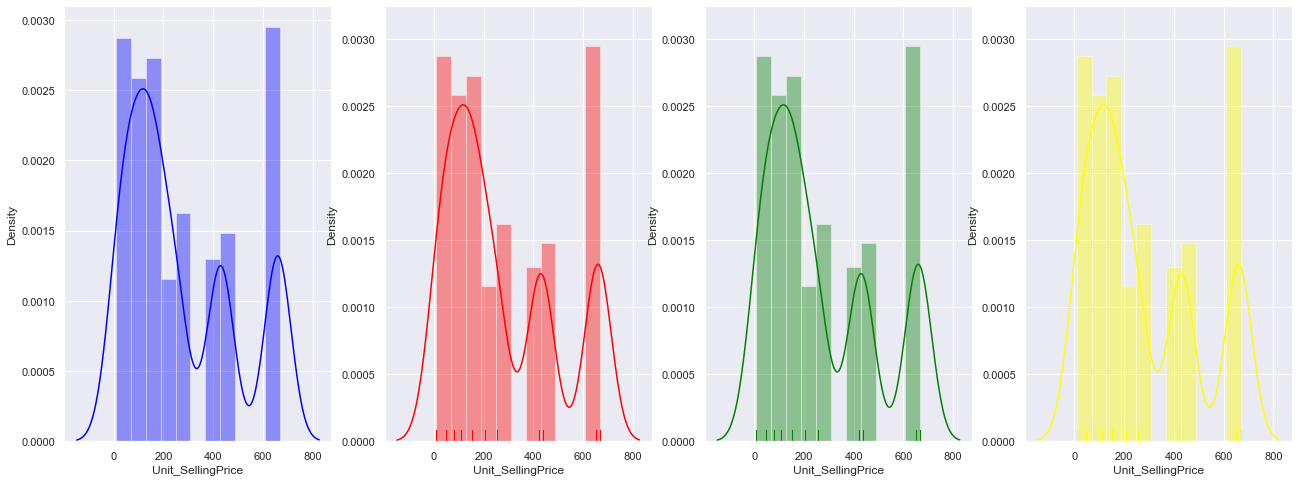

Unit_MakingCost


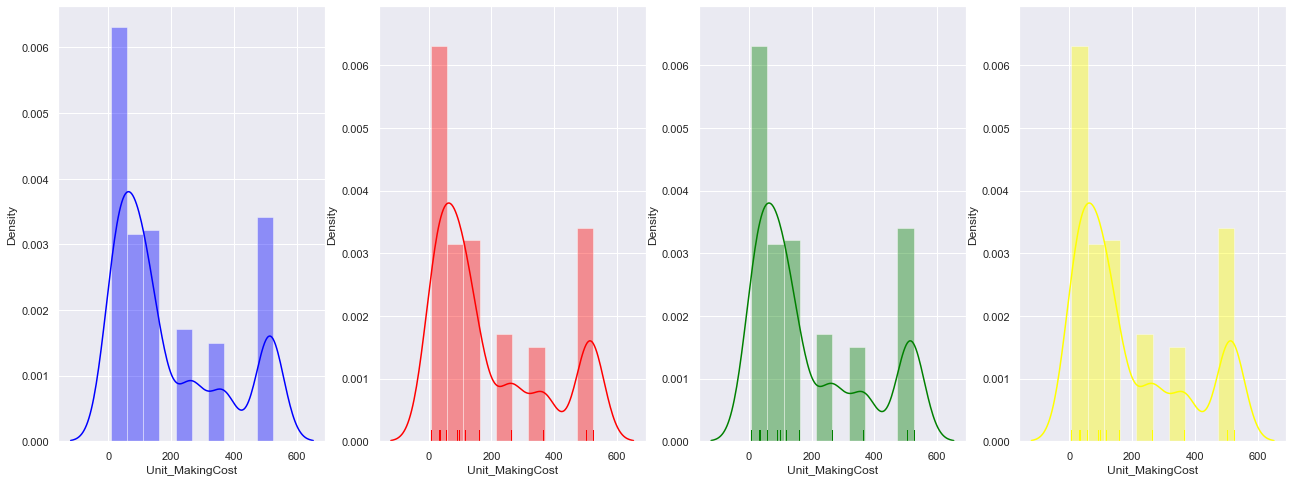

unit_per Profit


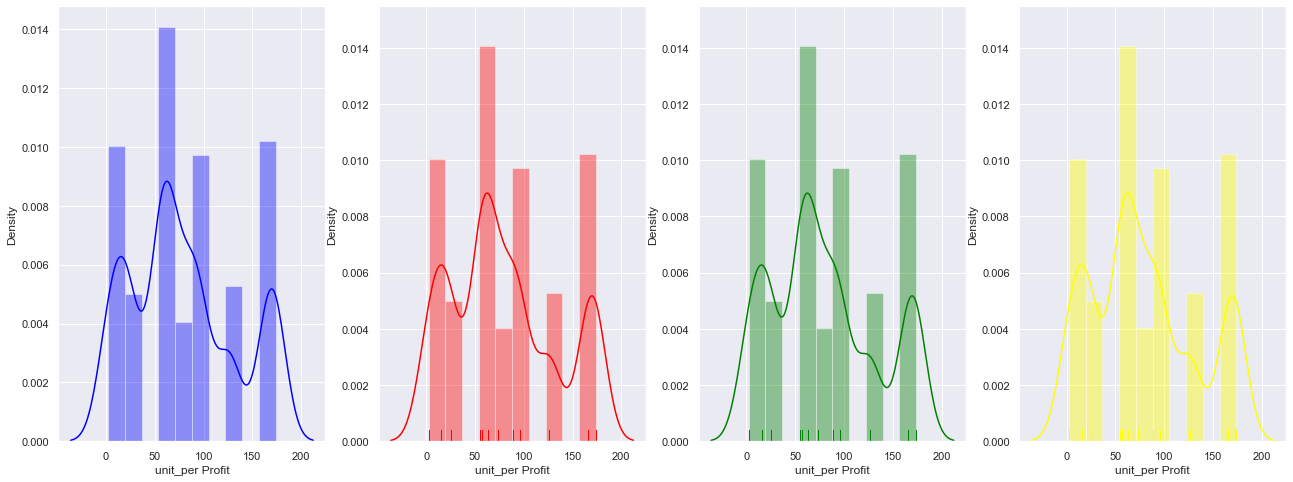

Total profit


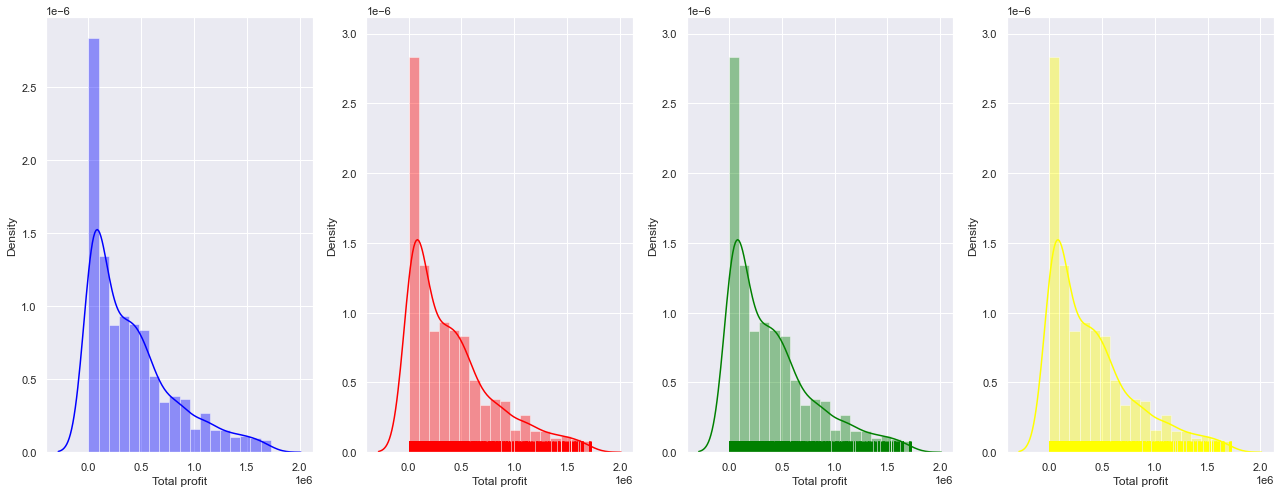

In [17]:
for column in numeric.columns:
 print(column)
 # code below
 fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(22,8))
 sns.distplot(numeric[column],ax=ax[0],color='blue',hist=True)
 sns.distplot(numeric[column],ax=ax[1],rug=True,hist=True,color='red')
 sns.distplot(numeric[column],ax=ax[2],rug=True,hist=True,color='green')
 sns.distplot(numeric[column],ax=ax[3],rug=True,hist=True,color='yellow')
 plt.show()


In [ ]:
fig=px.scatter(africa,x='Item_Type',y='Country',color='Unit_SellingPrice',color_discrete_sequence=px.colors.sequential.BuPu)
fig.update_layout(template='plotly_dark',title='To visualize the highest unit_sellingPrice')
pio.write_image(fig, "scatter.png")
fig.show()

In [18]:
asia=data[data['Region']=='Asia']
asia.head()


,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
3,Asia,North Korea,Cereal,Offline,L,2010,9016,205.70,117.11,88.59,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,2015,7542,152.58,97.44,55.14,415865.88
12,Asia,Malaysia,Cereal,Offline,L,2016,9762,205.70,117.11,88.59,864815.58
42,Asia,Laos,Meat,Online,L,2017,5522,421.89,364.69,57.20,315858.40
43,Asia,Kyrgyzstan,Snacks,Online,C,2013,340,152.58,97.44,55.14,18747.60


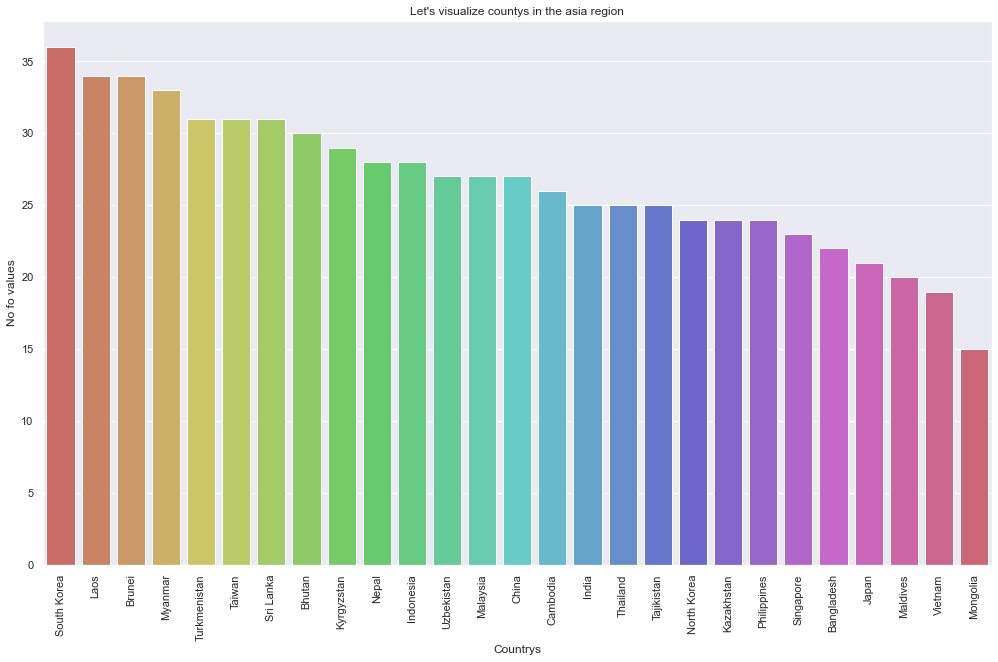

In [19]:
# To visualize the countys in the aisa region
asia_county=asia['Country'].value_counts()
ax=plt.axes()
sns.set(rc={'figure.figsize':(16,7)},style='dark')
ax.set_title("Let's visualize countys in the asia region")
sns.barplot(x=asia_county.index,y=asia_county,palette='hls')
plt.xlabel('Countrys')
plt.ylabel("No fo values")
plt.xticks(rotation=90)
plt.show()


In [20]:
india_china=asia[(asia['Country']=='India') | (asia['Country']=='China')]
india_china.head(3)


,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
158,Asia,China,Cosmetics,Offline,H,2015,7762,437.20,263.33,173.87,1349578.94
220,Asia,India,Snacks,Offline,M,2010,7422,152.58,97.44,55.14,409249.08
234,Asia,India,Office Supplies,Online,C,2010,7835,651.21,524.96,126.25,989168.75


In [ ]:
#Let's visualize the profit on india and china
fig=px.histogram(india_china,x='Item_Type',y='Total profit',color='Country',color_discrete_sequence=px.colors.sequential.Sunse)
fig.update_layout(template='presentation',title='To visualize the china and india total profit')
fig.show()
pio.write_image(fig, "india_china.png")

In [15]:

fig=px.pie(india_china,values='Total profit',names='Sales_Channel',color='Item_Type',color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()


Observation;
1) According to the chinna get more profit on Cosmetics 2.4 M 2) India get more profit at office supplies 4.2 M

In [ ]:
fig=px.scatter(india_china,y='Total profit',x='Year',color='Country',color_discrete_sequence=px.colors.sequential.gray)
fig.update_layout(template='gridon',title='visualize total profit by year wise')
pio.write_image(fig, "scatter1.png")
fig.show()


In [ ]:
#Let's visualize the total profit in all the countys in the asia region
fig=px.histogram(asia,x='Country',y='Total profit',color='Year',color_discrete_sequence=px.colors.sequential.ice)
fig.update_layout(template='plotly_white',title='To visualize the total profits by year wise')
pio.write_image(fig, "asia.png")
fig.show()

In [21]:
asia.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Year,Units_Sold,Unit_SellingPrice,Unit_MakingCost,unit_per Profit,Total profit
3,Asia,North Korea,Cereal,Offline,L,2010,9016,205.70,117.11,88.59,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,2015,7542,152.58,97.44,55.14,415865.88
12,Asia,Malaysia,Cereal,Offline,L,2016,9762,205.70,117.11,88.59,864815.58
42,Asia,Laos,Meat,Online,L,2017,5522,421.89,364.69,57.20,315858.40
43,Asia,Kyrgyzstan,Snacks,Online,C,2013,340,152.58,97.44,55.14,18747.60


In [19]:
cosmetic=asia[asia['Item_Type']=='Cosmetics'].groupby(['Country','Units_Sold']).agg('sum').sort_values(by='Units_Sold',ascending=False)
cosmetic=cosmetic.reset_index()
fig=px.scatter(cosmetic,x='Total profit',y='Units_Sold',color='Country',color_discrete_sequence=px.colors.sequential.YlGn)
fig.update_layout(title="To visualize the tos uints sold in cosmetics",template='gridon')


In [ ]:
fig = px.ecdf(data, y="Total profit",color='Region', x="Year",color_discrete_sequence=px.colors.sequential.Jet)
fig.update_layout(template='plotly_dark')
fig.show()
pio.write_image(fig, "ecdf.png")


In [22]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [23]:
#Covert the categroical to numerical
label=LabelEncoder()
data['Region']=label.fit_transform(data['Region'])
data['Country']=label.fit_transform(data['Country'])
data['Item_Type']=label.fit_transform(data['Item_Type'])

In [24]:
data['Sales_Channel']=label.fit_transform(data['Sales_Channel'])
data['Order_Priority']=label.fit_transform(data['Order_Priority'])

In [25]:

X=data.drop(['Total profit'],axis=1)
y=data['Total profit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 10)
(3500,)
(1500, 10)
(1500,)


In [27]:

#Modeling
def model(model,X_train,X_test,y_train,y_test):
 model.fit(X_train,y_train)
 y_pred=model.predict(X_test)
 mean_squred=mean_squared_error(y_test,y_pred)
 root_mean=np.sqrt(mean_squred)
 mean_absolute_error_1=mean_absolute_error(y_test,y_pred)
 print(f'The {model} train data accuracys core is {model.score(X_test,y_test)}')
 print(f'The {model} test data accuracy score is {model.score(X_test,y_test)}')
 print('-----------------------------------------------------------------------')
 print('-----------------------------------------------------------------------')
 print(f'The {model} mean_squared_error accuracys core is {mean_squred}')
 print(f'The {model} root_mean_squared_error accuracys core is {root_mean}')
 print(f'The {model} mean_absolute_error accuracys core is {mean_absolute_error_1}')
 print('-----------------------------------------------------------------------')
 print('-----------------------------------------------------------------------')

In [28]:
linear=LinearRegression()
model(linear,X_train,X_test,y_train,y_test)

The LinearRegression() train data accuracys core is 0.8398466768716164
The LinearRegression() test data accuracy score is 0.8398466768716164
-----------------------------------------------------------------------
-----------------------------------------------------------------------
The LinearRegression() mean_squared_error accuracys core is 23770037214.178665
The LinearRegression() root_mean_squared_error accuracys core is 154175.3456755608
The LinearRegression() mean_absolute_error accuracys core is 110069.19312831108
-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [29]:
#DecisionTreeRegreesor
tree=DecisionTreeRegressor()
model(tree,X_train,X_test,y_train,y_test)


The DecisionTreeRegressor() train data accuracys core is 0.9997358779843432
The DecisionTreeRegressor() test data accuracy score is 0.9997358779843432
-----------------------------------------------------------------------
-----------------------------------------------------------------------
The DecisionTreeRegressor() mean_squared_error accuracys core is 39201123.140071146
The DecisionTreeRegressor() root_mean_squared_error accuracys core is 6261.08002984079
The DecisionTreeRegressor() mean_absolute_error accuracys core is 3352.5100333333326
-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [30]:
#RandomForestRegressor
random=RandomForestRegressor()
model(random,X_train,X_test,y_train,y_test)


The RandomForestRegressor() train data accuracys core is 0.9998559600712809
The RandomForestRegressor() test data accuracy score is 0.9998559600712809
-----------------------------------------------------------------------
-----------------------------------------------------------------------
The RandomForestRegressor() mean_squared_error accuracys core is 21378479.066816695
The RandomForestRegressor() root_mean_squared_error accuracys core is 4623.686739693412
The RandomForestRegressor() mean_absolute_error accuracys core is 2601.4191855999798
-----------------------------------------------------------------------
-----------------------------------------------------------------------


## From the Modeling
The RandomforestRegressor give best mean_absolute_error better to others

Deep Learning algorithm

In [35]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,ReLU


In [37]:
# building and model 
model=Sequential()
model.add(Dense(units=50, kernel_initializer='normal', activation='ReLU') )
model.add(Dropout(0.2))
model.add(Dense(units=80, kernel_initializer='normal', activation='ReLU') )
model.add(Dropout(0.2))
model.add(Dense(units=120, kernel_initializer='normal', activation='ReLU') )
model.add(Dropout(0.3))
model.add(Dense(1, activation ='linear'))


In [39]:
min_max=MinMaxScaler()
# X_train=min_max.fit_transform(X_train)
# X_test=min_max.fit_transform(X_test)
msle = tf.keras.losses.MeanSquaredLogarithmicError()
model.compile(loss= msle, optimizer='adam', metrics=[msle])

In [40]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=20)

Epoch 1/20
83/83 [==============================] - 2s 10ms/step - loss: 26.3242 - mean_squared_logarithmic_error: 26.1736 - val_loss: 8.7112 - val_mean_squared_logarithmic_error: 8.7059
Epoch 2/20
83/83 [==============================] - 0s 5ms/step - loss: 4.8180 - mean_squared_logarithmic_error: 4.7619 - val_loss: 2.5105 - val_mean_squared_logarithmic_error: 2.5016
Epoch 3/20
83/83 [==============================] - 0s 5ms/step - loss: 1.9786 - mean_squared_logarithmic_error: 1.9594 - val_loss: 1.6426 - val_mean_squared_logarithmic_error: 1.6323
Epoch 4/20
83/83 [==============================] - 0s 5ms/step - loss: 1.6515 - mean_squared_logarithmic_error: 1.6491 - val_loss: 1.5696 - val_mean_squared_logarithmic_error: 1.5595
Epoch 5/20
83/83 [==============================] - 0s 5ms/step - loss: 1.5807 - mean_squared_logarithmic_error: 1.5764 - val_loss: 1.5226 - val_mean_squared_logarithmic_error: 1.5131
Epoch 6/20
83/83 [==============================] - 0s 4ms/step - loss: 1.536

In [41]:
def plot_history(history, key):
 plt.plot(history.history[key])
 plt.plot(history.history['val_'+key])
 plt.xlabel("Epochs")
 plt.ylabel(key)
 plt.legend([key, 'val_'+key])
 plt.show()


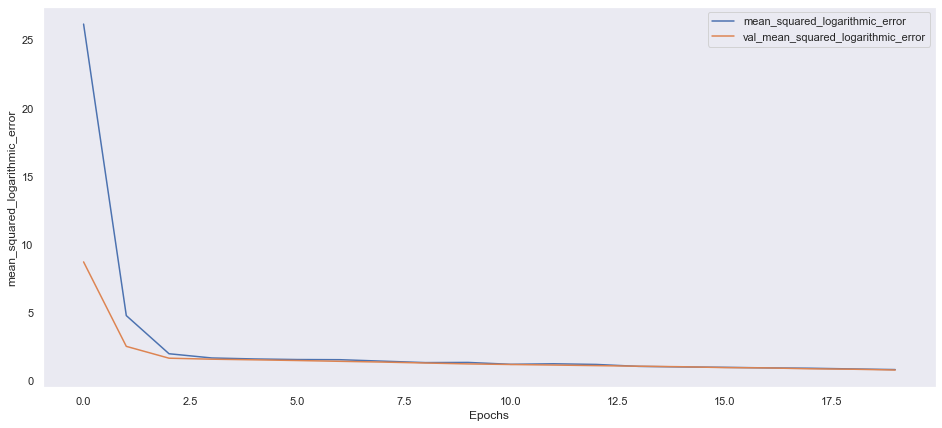

In [42]:
plot_history(history, 'mean_squared_logarithmic_error')